<a href="https://colab.research.google.com/github/SentaFito53/KNN_ARM_BAND/blob/main/TRAIN_KNN_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Library Import & Data Import

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('/content/eeg_activity_COMBINED_20250712_155159.csv')
df


,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
0,1.752310e+09,0,-0.269976,0.031647,0.213131,-3.388051,-0.101784,1.849736,-4.484004,-0.124377
1,1.752310e+09,0,-1.870797,0.227191,1.486370,-23.525475,-0.703936,12.855653,-31.144278,-0.862536
2,1.752310e+09,0,-6.115326,0.782712,4.909908,-77.175655,-2.298486,42.219261,-102.212455,-2.824127
3,1.752310e+09,0,-12.835698,1.770928,10.478712,-162.905726,-4.814098,89.260451,-215.878758,-5.935153
4,1.752310e+09,0,-19.922331,3.063145,16.703962,-255.155651,-7.418957,140.182104,-338.374052,-9.189453
...,...,...,...,...,...,...,...,...,...,...
2699995,1.752311e+09,2,334.889731,-198.921976,-179.667057,-51.292948,-108.063712,-138.326697,-253.513076,-124.665194
2699996,1.752311e+09,2,246.894718,-258.122446,-234.322059,-107.409555,-163.143017,-185.712166,-272.135635,-167.132889
2699997,1.752311e+09,2,140.913728,-310.415648,-286.207854,-158.693304,-209.151293,-220.029188,-291.605305,-215.044802
2699998,1.752311e+09,2,44.286569,-344.717321,-322.227229,-194.580565,-240.734233,-241.722724,-317.666849,-252.769951


## 2. Data Understanding

In [4]:
print ("data shape : ", df.shape) #untuk mengetahui dimensi data (row, col)

data shape :  (2700000, 10)


In [5]:
df.info() #untuk mengetahui tipe data dari setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       float64
 1   activity_label  int64  
 2   ch_0            float64
 3   ch_1            float64
 4   ch_2            float64
 5   ch_3            float64
 6   ch_4            float64
 7   ch_5            float64
 8   ch_6            float64
 9   ch_7            float64
dtypes: float64(9), int64(1)
memory usage: 206.0 MB


In [ ]:
df.describe() #untuk mengetahui statistik deskriptif dari data

,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
count,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06
mean,1.752310e+09,1.000000e+00,1.908892e-02,1.123391e-02,1.646648e-02,2.015433e-02,4.405082e-02,2.134443e-02,8.028341e-02,-2.350502e-02
std,5.919727e+01,8.164967e-01,3.350978e+02,3.116205e+02,3.085540e+02,3.265135e+02,3.815733e+02,4.451328e+02,3.848710e+02,3.186030e+02
min,1.752310e+09,0.000000e+00,-1.046100e+04,-1.092326e+04,-1.108331e+04,-1.109386e+04,-1.090400e+04,-1.086879e+04,-8.805331e+03,-1.054997e+04
25%,1.752310e+09,0.000000e+00,-2.249457e+01,-2.373630e+01,-2.928331e+01,-3.490985e+01,-2.845534e+01,-2.244714e+01,-2.507816e+01,-1.656645e+01
50%,1.752310e+09,1.000000e+00,-2.604264e-02,-1.297370e-01,-2.107571e-01,-2.247638e-01,-1.906466e-01,-1.496565e-01,-2.166716e-01,-1.997497e-02
75%,1.752310e+09,2.000000e+00,2.113601e+01,2.069524e+01,2.282490e+01,2.596816e+01,2.049440e+01,1.872282e+01,1.995531e+01,1.703954e+01
max,1.752311e+09,2.000000e+00,6.272114e+03,5.966937e+03,6.177984e+03,6.319248e+03,8.601565e+03,1.121172e+04,1.402938e+04,6.228350e+03


In [ ]:
df.activity_label.value_counts() #untuk mengetahui jumlah data dari setiap kategori

,count
activity_label,
0,900000
1,900000
2,900000


## 3. Cleaning Data
untuk menindaklanjuti data yang kosong, double, atau rusak

In [15]:
df.isnull().sum() #untuk melihat missing value atau data yang kosong

,0
timestamp,0
activity_label,0
ch_0,0
ch_1,0
ch_2,0
ch_3,0
ch_4,0
ch_5,0
ch_6,0
ch_7,0


In [7]:
df.duplicated().sum() #untuk melihat data yang duplikat

np.int64(0)

## 4.Exploratory Data Analysis (EDA)
Penjabaran data dari tiap" atribut data

/tmp/ipython-input-64-2645591038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'activity_label', data = df, palette='flare')


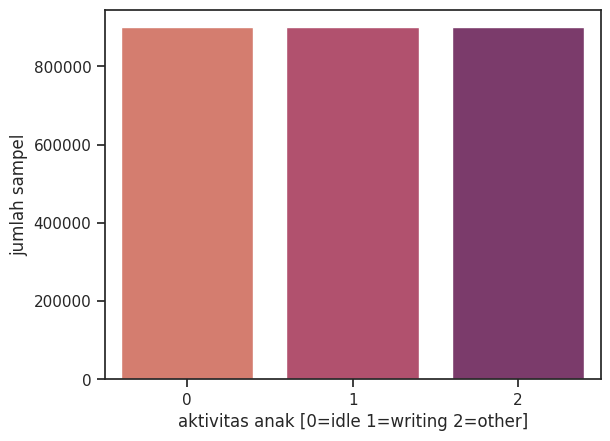

In [ ]:
sns.set_theme(style = 'ticks')
sns.countplot(x = 'activity_label', data = df, palette='flare')
plt.xlabel("aktivitas anak [0=idle 1=writing 2=other]")
plt.ylabel("jumlah sampel")
plt.show()

/tmp/ipython-input-65-1526760191.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


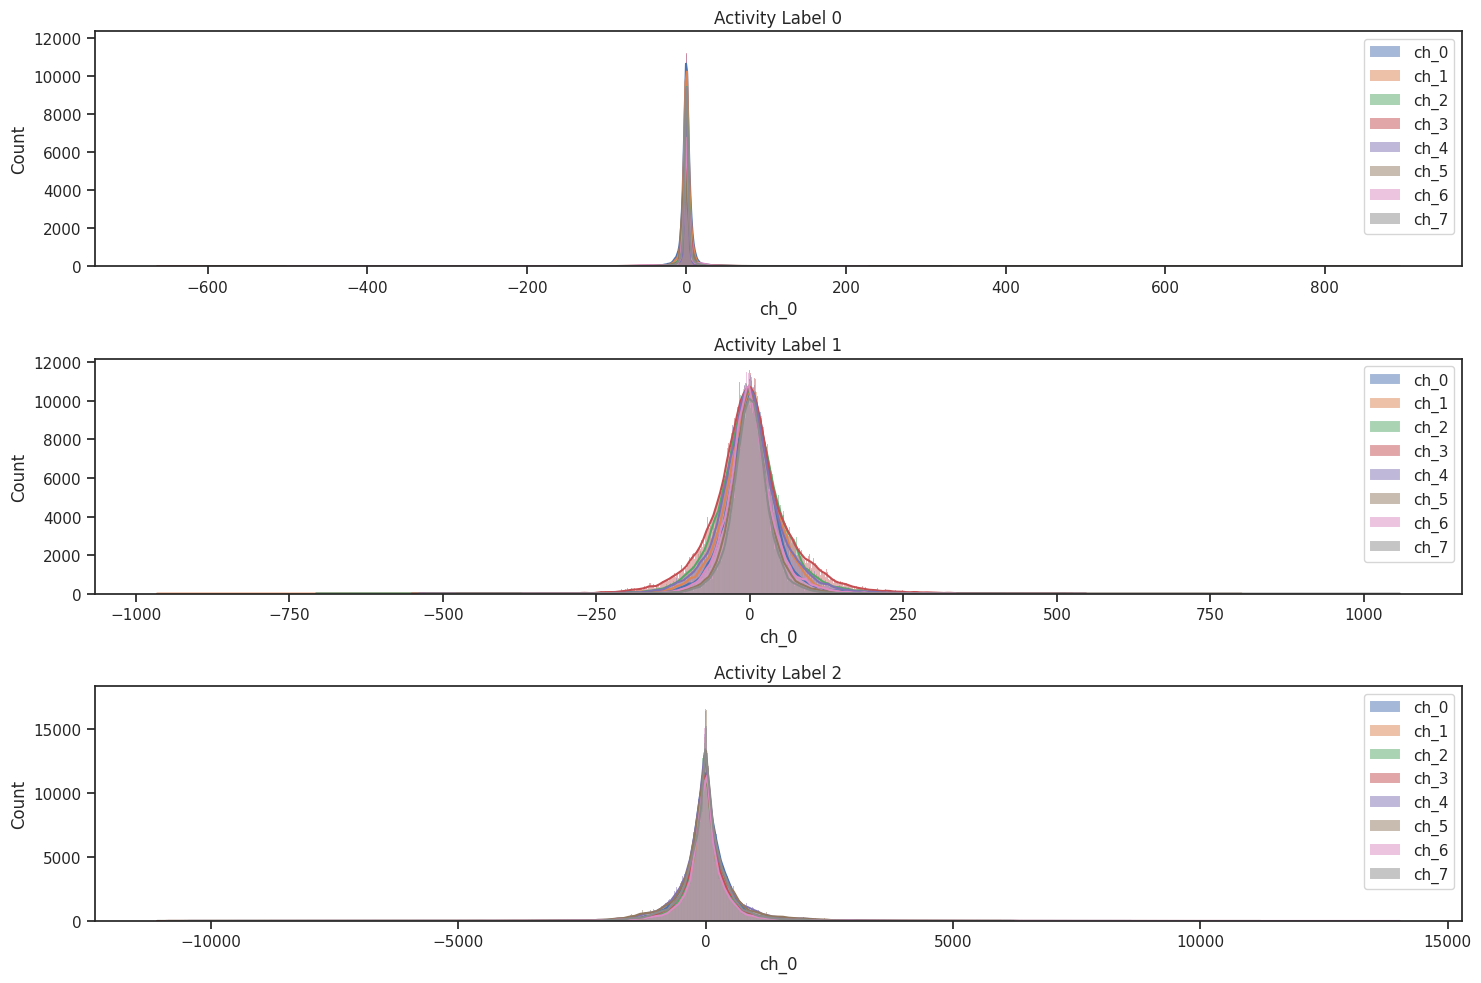

In [ ]:
plt.figure(figsize=(15, 10))
for i, label in enumerate([0, 1, 2], 1):
    plt.subplot(3, 1, i)
    df_label = df[df['activity_label'] == label]
    for ch in range(8):
        sns.histplot(df_label[f'ch_{ch}'], label=f'ch_{ch}', kde=True, alpha=0.5)
    plt.title(f'Activity Label {label}')
    plt.legend()
plt.tight_layout()
plt.show()

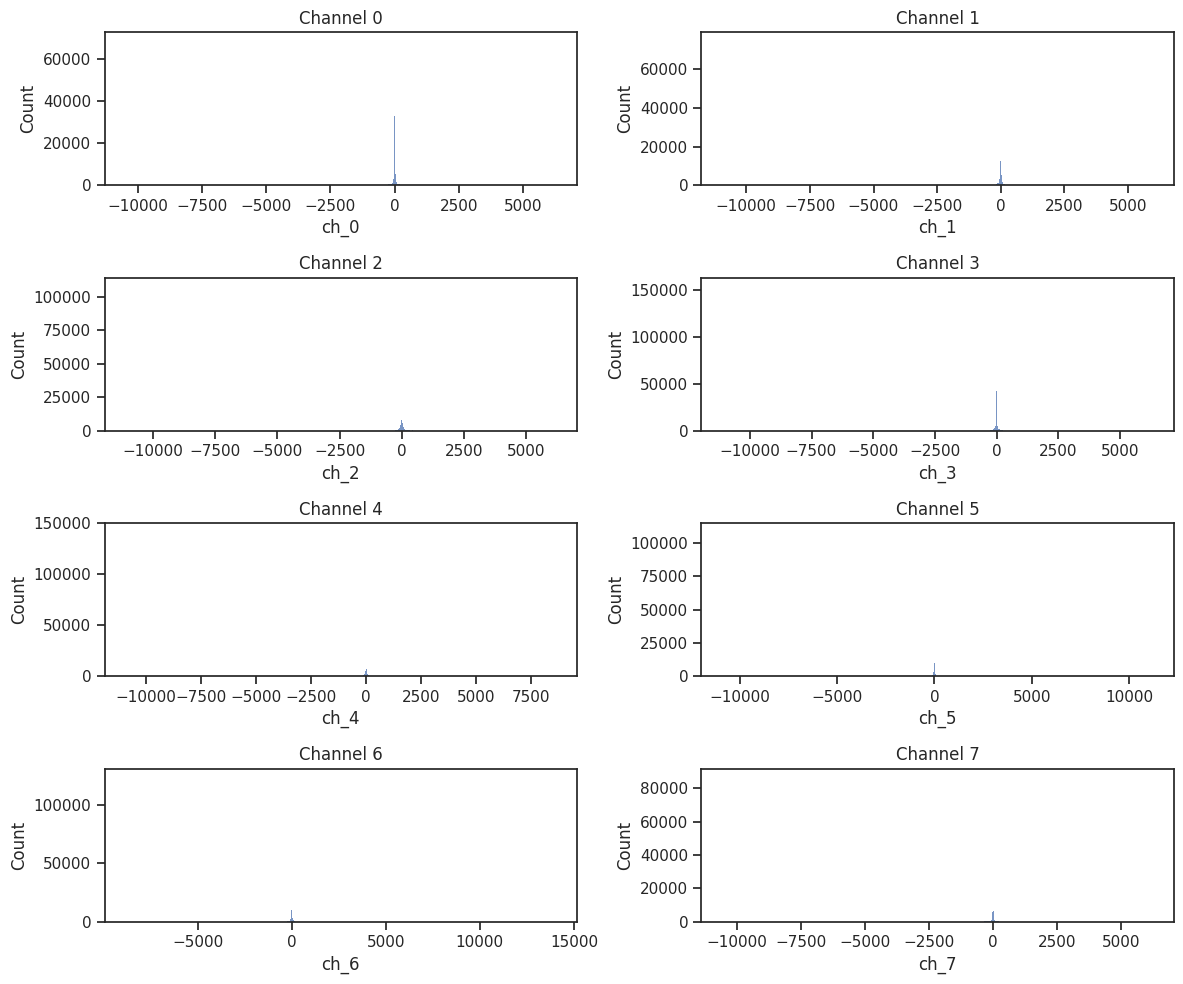

In [ ]:
# Visualisasi data dengan grafik dalam subplot terpisah
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for i in range(8):
    sns.histplot(df[f'ch_{i}'], ax=axes[i])
    axes[i].set_title(f'Channel {i}')

plt.tight_layout()
plt.show()

## 4. Data Preparation
Pada tahap ini pastikan data tidak ada yang bertipe string, kalau ada convert jadi int atau float

In [16]:
df.head() #menampilkan 5 baris pertama data

,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
0,1.752310e+09,0,-0.269976,0.031647,0.213131,-3.388051,-0.101784,1.849736,-4.484004,-0.124377
1,1.752310e+09,0,-1.870797,0.227191,1.486370,-23.525475,-0.703936,12.855653,-31.144278,-0.862536
2,1.752310e+09,0,-6.115326,0.782712,4.909908,-77.175655,-2.298486,42.219261,-102.212455,-2.824127
3,1.752310e+09,0,-12.835698,1.770928,10.478712,-162.905726,-4.814098,89.260451,-215.878758,-5.935153
4,1.752310e+09,0,-19.922331,3.063145,16.703962,-255.155651,-7.418957,140.182104,-338.374052,-9.189453


In [17]:
# Proses membagi data menjadi variabel X dan Y

X = df.drop(columns = ['activity_label','timestamp']) #sebagai var X, kita mengambil data ch0-ch7, maka hapus label dan timestamp
y = df['activity_label'] #ambil activity label sebagai var Y

print("X : ", X.shape)
print("y : ", y.shape)


X :  (2700000, 8)
y :  (2700000,)


In [26]:
# masuk proses spliting data
# untuk membagi banyak data yang ditrain dan dites

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 0,2 artinya pembagian data 80 banding 20, 80% train dan 20% test
# Dengan random_state=42 (atau angka lain), hasil pembagian akan sama persis setiap kali di-run.

In [27]:
# Melihat hasil splitting data
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (2160000, 8)
y_train :  (2160000,)
X_test :  (540000, 8)
y_test :  (540000,)


## 5. Modeling

In [28]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Accuracy KNN: {:.2f}%".format(KNN_acc*100)) #melihat tingkat akurasi

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    179843
           1       0.95      0.97      0.96    180057
           2       0.99      0.94      0.97    180100

    accuracy                           0.97    540000
   macro avg       0.97      0.97      0.97    540000
weighted avg       0.97      0.97      0.97    540000

Accuracy KNN: 97.25%


## 6. Testing

In [29]:
data_test = pd.read_csv('/content/eeg_activity_COMBINED_20250712_155159.csv')
data_test = df.drop(columns=['timestamp', 'activity_label'])  # Jika ada kolom lain selain ch_0-ch_7
data_test = data_test.tail(500)
data_test = pd.DataFrame(data_test)
data_test

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
2699500,1492.811014,1029.430434,1442.956869,1569.543427,1711.922068,1775.420959,1262.862623,1407.470656
2699501,1531.648620,1030.106500,1443.093854,1556.060152,1701.079251,1767.490258,1266.803218,1515.649283
2699502,1450.028767,913.992055,1325.716737,1430.531357,1579.176567,1641.801862,1132.755953,1478.408272
2699503,1318.873477,758.455961,1167.960393,1270.072501,1428.005823,1484.458202,942.899119,1351.171126
2699504,1214.466284,642.630601,1045.384037,1146.436042,1321.925013,1381.257124,801.831557,1217.902243
...,...,...,...,...,...,...,...,...
2699995,334.889731,-198.921976,-179.667057,-51.292948,-108.063712,-138.326697,-253.513076,-124.665194
2699996,246.894718,-258.122446,-234.322059,-107.409555,-163.143017,-185.712166,-272.135635,-167.132889
2699997,140.913728,-310.415648,-286.207854,-158.693304,-209.151293,-220.029188,-291.605305,-215.044802
2699998,44.286569,-344.717321,-322.227229,-194.580565,-240.734233,-241.722724,-317.666849,-252.769951


In [30]:
pred_coba = knn.predict(data_test)
print("Hasil Prediksi dari Aktivitas Anak")
print(pred_coba)
print("0 = IDLE")
print("1 = WRITING")
print("2 = OTHER")

Hasil Prediksi dari Aktivitas Anak
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

## 7. Save Model dan Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
import joblib

# Buat objek scaler dan fit-kan pada data latih
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model dengan data yang sudah diskalakan
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scaled, y_train)

# Simpan model dan scaler
joblib.dump(knn, 'model_knn.pkl')
joblib.dump(scaler, 'scaler_knn.pkl')

# Unduh ke komputer
from google.colab import files
files.download('model_knn.pkl')
files.download('scaler_knn.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 8. Test Model

In [ ]:
import pandas as pd
import joblib

# 1. Load model dan scaler dari file .pkl
knn = joblib.load('/content/model_knn.pkl')
scaler = joblib.load('/content/scaler_knn.pkl')

# 2. Load data test dari CSV
data_test = pd.read_csv('/content/eeg_activity_COMBINED_20250712_155159.csv')

# 3. Ambil hanya fitur ch_0 sampai ch_7
# Pastikan nama kolomnya sesuai — jika kolomnya bernama 'ch_0', ..., 'ch_7'
fitur_sensor = ['ch_0', 'ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7']
data_test = data_test[fitur_sensor]

# 4. Ambil hanya 20 baris pertama
data_test = data_test.tail(1000)

# 5. Transformasikan data menggunakan scaler yang sudah dilatih
data_test_scaled = scaler.transform(data_test)

# 6. Lakukan prediksi
pred_coba = knn.predict(data_test_scaled)

# 7. Tampilkan hasil prediksi
print("Hasil Prediksi dari Aktivitas Anak")
print(pred_coba)
print("0 = IDLE")
print("1 = WRITING")
print("2 = OTHER")


Hasil Prediksi dari Aktivitas Anak
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

## 9. UNTUK MELIHAT TINGKAT AKURASI MODEL TERHADAP DATA TRAIN

In [33]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load model dan scaler
knn = joblib.load('/content/model_knn.pkl')
scaler = joblib.load('/content/scaler_knn.pkl')

# 2. Load dataset
data_test = pd.read_csv('/content/eeg_activity_COMBINED_20250712_155159.csv')

# 3. Pisahkan fitur dan label
fitur_sensor = ['ch_0', 'ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7']
X = data_test[fitur_sensor]
y_true = data_test['activity_label']

# 4. (Hapus pembatasan baris agar seluruh dataset digunakan)
# X = X.head(1000)
# y_true = y_true.head(1000)

# 5. Transformasi dengan scaler
X_scaled = scaler.transform(X)

# 6. Prediksi
y_pred = knn.predict(X_scaled)

# 7. Evaluasi akurasi
akurasi = accuracy_score(y_true, y_pred)
print(f"Akurasi model terhadap seluruh dataset: {akurasi * 100:.2f}%")

# (Opsional) Tampilkan confusion matrix dan classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Tampilkan hasil prediksi per baris (opsional)
hasil_df = data_test.copy()
hasil_df['prediksi'] = y_pred
print("\nContoh hasil prediksi vs label asli:")
print(hasil_df[['activity_label', 'prediksi']].head(10))


Akurasi model terhadap seluruh dataset: 98.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    900000
           1       0.96      0.98      0.97    900000
           2       0.99      0.96      0.98    900000

    accuracy                           0.98   2700000
   macro avg       0.98      0.98      0.98   2700000
weighted avg       0.98      0.98      0.98   2700000

Confusion Matrix:
[[899345    627     28]
 [  8340 884647   7013]
 [   848  35382 863770]]

Contoh hasil prediksi vs label asli:
   activity_label  prediksi
0               0         0
1               0         0
2               0         0
3               0         0
4               0         0
5               0         0
6               0         0
7               0         0
8               0         0
9               0         0
